,avg_value_ammonia,median_value_ammonia,max_value_ammonia,min_value_ammonia,start_date,avg_value_ecoli,median_value_ecoli,max_value_ecoli,min_value_ecoli
count,37.000000,37.000000,37.000000,37.000000,116,36.000000,36.000000,36.000000,36.000000
mean,0.052478,0.053559,0.057238,0.046638,2009-01-23 00:00:00,633.996759,629.893056,715.063889,557.033333
min,0.005000,0.005000,0.005000,0.000000,1994-11-23 00:00:00,6.000000,6.000000,6.000000,1.000000
25%,0.008000,0.008000,0.008000,0.008000,2001-12-23 12:00:00,75.337500,75.337500,100.125000,26.375000
50%,0.020000,0.020000,0.020000,0.017000,2009-01-23 00:00:00,189.700000,189.700000,189.700000,116.600000
75%,0.037750,0.037750,0.050000,0.030000,2016-02-23 12:00:00,505.000000,540.000000,671.600000,373.600000
max,0.750000,0.750000,0.750000,0.750000,2023-03-26 00:00:00,10000.000000,10000.000000,10000.000000,10000.000000
std,0.126723,0.128083,0.128864,0.126512,NaN,1681.110586,1677.680930,1706.066280,1676.542924


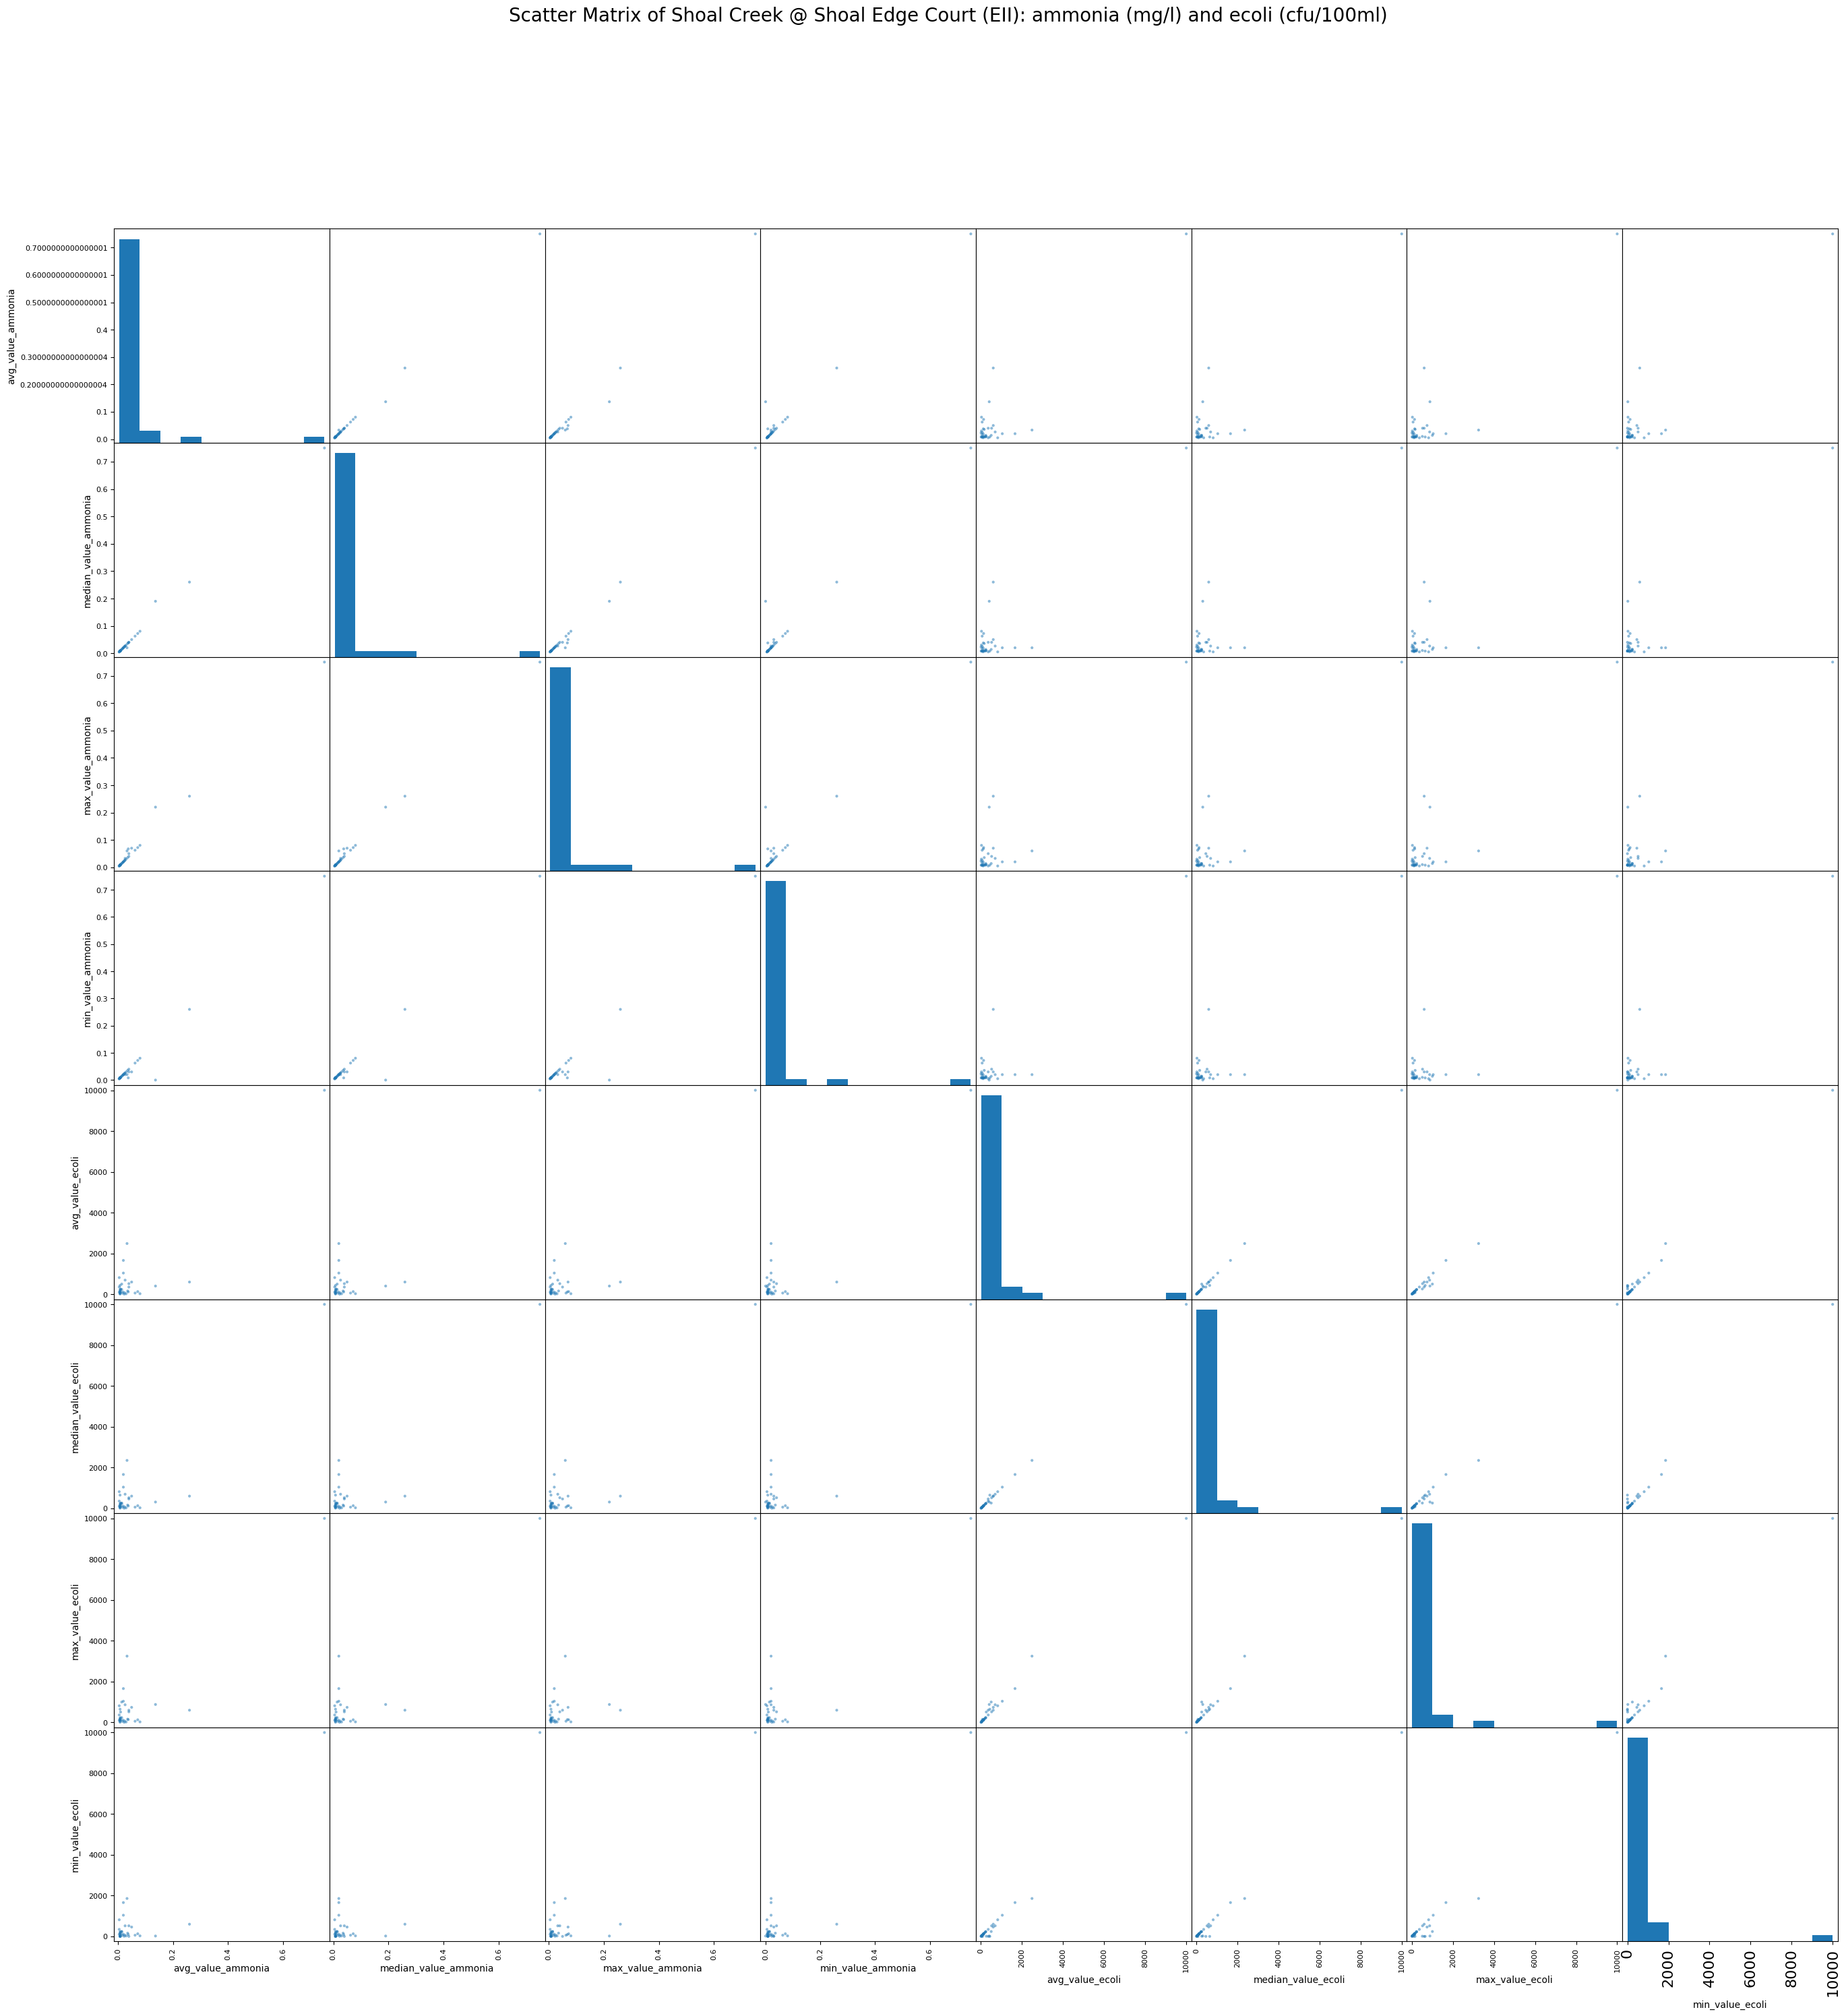

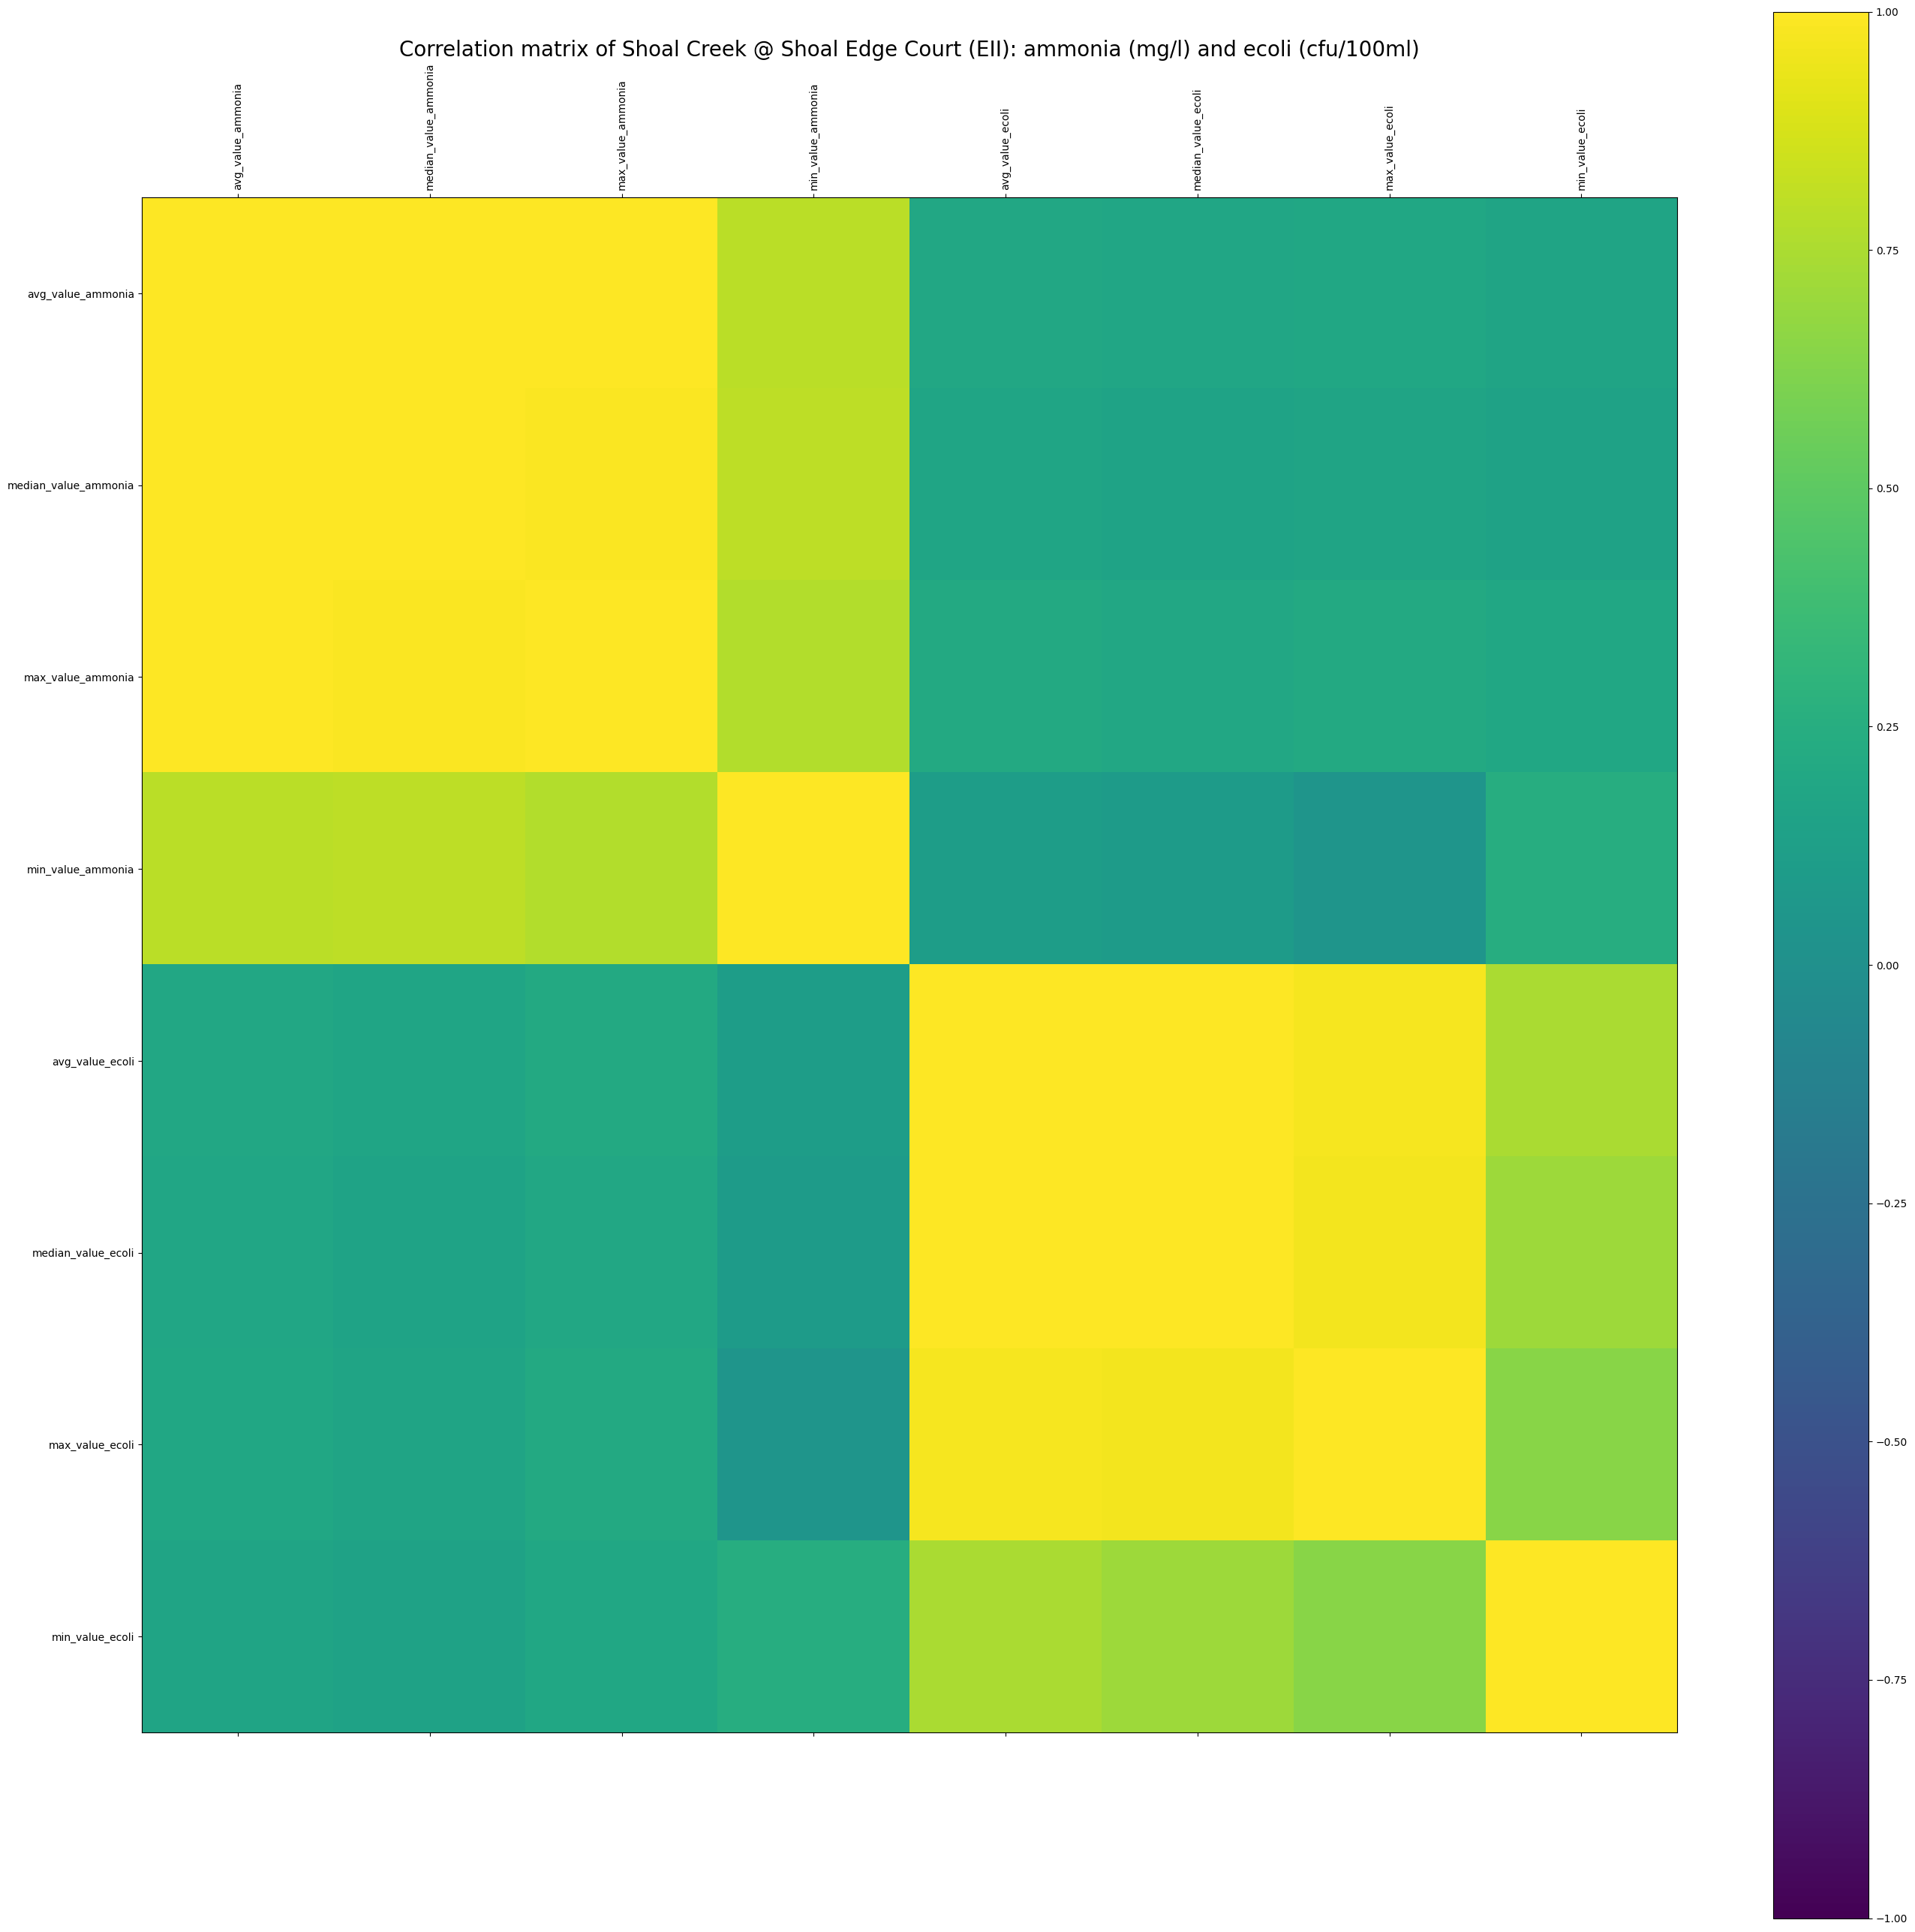

,avg_value_ammonia,median_value_ammonia,max_value_ammonia,min_value_ammonia,avg_value_ecoli,median_value_ecoli,max_value_ecoli,min_value_ecoli
avg_value_ammonia,1.000000,0.995024,0.995864,0.796565,0.201972,0.183011,0.193619,0.171842
median_value_ammonia,0.995024,1.000000,0.986571,0.800797,0.176752,0.157785,0.167879,0.150100
max_value_ammonia,0.995864,0.986571,1.000000,0.771629,0.218406,0.198670,0.213096,0.190880
min_value_ammonia,0.796565,0.800797,0.771629,1.000000,0.112379,0.101147,0.041963,0.247198
avg_value_ecoli,0.201972,0.176752,0.218406,0.112379,1.000000,0.993499,0.976377,0.746103
median_value_ecoli,0.183011,0.157785,0.198670,0.101147,0.993499,1.000000,0.967557,0.703511
max_value_ecoli,0.193619,0.167879,0.213096,0.041963,0.976377,0.967557,1.000000,0.642213
min_value_ecoli,0.171842,0.150100,0.190880,0.247198,0.746103,0.703511,0.642213,1.000000


In [1]:
import warnings
import geopandas

warnings.filterwarnings('ignore')
geopandas.options.io_engine = "pyogrio"
%matplotlib inline
%load_ext autoreload
%autoreload 2

from plotting import plot_correlation, plot_parameter
import intervals

ammonia = intervals.query("ammonia", intervals.location_2222)
ammonia = ammonia.drop(['end_date', 'sample_location', 'geometry', 'parameter', 'unit'], axis=1)

ecoli = intervals.query("ecoli", intervals.location_2222)
ecoli = ecoli.drop(['end_date', 'sample_location', 'geometry', 'parameter', 'unit'], axis=1)

joined = ammonia.merge(ecoli, how='left', on='start_date', suffixes = (f'_ammonia', '_ecoli'))
plot_correlation(joined, title=f"{intervals.location_2222}: ammonia ({intervals.units['ammonia']}) and ecoli ({intervals.units['ecoli']})")